## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset and checking its shape

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv') # Importing dataset

print(dataset.shape) # checking shape of data

(1000, 8)


In [3]:
dataset.columns # Displaying the columns of the dataset

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
dataset.head() # Displaying head of the dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.info() # To check information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
dataset.isnull().sum() # Checking if there are null values in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
dataset.select_dtypes('object').nunique() # Checking number of unique members is each dataset

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [8]:
print("gender = : ")
print(dataset['gender'].unique(), "\n")
print("race/ethnicity = : ")
print(dataset['race/ethnicity'].unique(),  "\n")
print("parental level of education = : ")
print(dataset['parental level of education'].unique(),  "\n")
print("lunch = : ")
print(dataset['lunch'].unique(),  "\n")
print("test preparation course variable = : ")
print(dataset['test preparation course'].unique(),  "\n")

gender = : 
['female' 'male'] 

race/ethnicity = : 
['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education = : 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch = : 
['standard' 'free/reduced'] 

test preparation course variable = : 
['none' 'completed'] 



In [9]:
dataset.describe() # Displaying the information about columns containing numerical data

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Now creating a function to tell whether a student has failed or not using a criteria

In [10]:
#Function created to tell if a student has passed or failed
def passFail(Math, Writing, Reading):
    if(Math>50 and Writing>50 and Reading>50):
        return 'P'
    else:
        return 'F'

## Adding a new column 'class' which is used for pass or fail

In [11]:
dataset['class']=dataset.apply(lambda x: passFail(x['math score'],x['writing score'],x['reading score']),axis = 1 )

In [13]:
# Count of number of students who have passed and failed
dataset['class'].value_counts() 

P    796
F    204
Name: class, dtype: int64

In [14]:
# Count the number of males and females in the dataset
dataset['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### Now starting to plot our data to check which columns are needed.

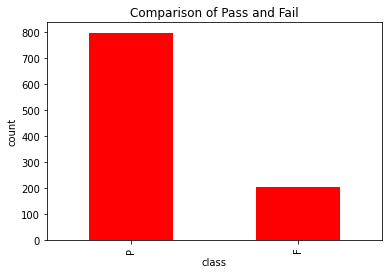

In [15]:
# Bar plot of class 

dataset['class'].value_counts(normalize = True)
dataset['class'].value_counts(dropna = False).plot.bar(color = 'Red')
plt.title('Comparison of Pass and Fail')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

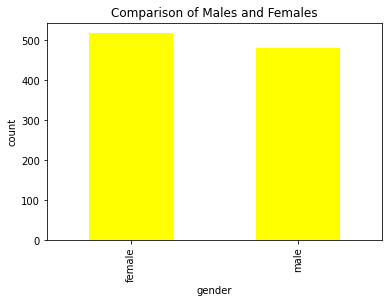

In [16]:
# Bar plot of gender

dataset['gender'].value_counts(normalize = True)
dataset['gender'].value_counts(dropna = False).plot.bar(color = 'Yellow')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='class'>

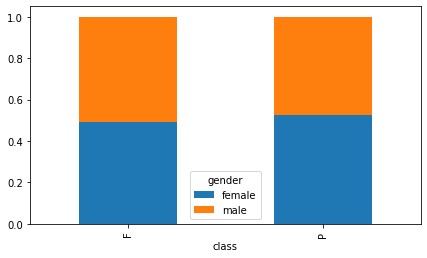

In [17]:
# Crosstab of class and gender
x = pd.crosstab(dataset['class'], dataset['gender'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 4))

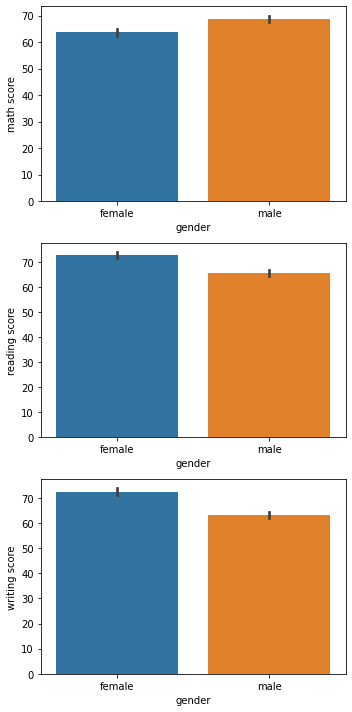

In [18]:
# Gender with maths score, reading score and writing score
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=dataset['gender'],y=dataset['math score'], ax=ax[0], linewidth=2.5)
sns.barplot(x=dataset['gender'],y=dataset['reading score'], ax=ax[1],linewidth=2.5)
sns.barplot(x=dataset['gender'],y=dataset['writing score'], ax=ax[2],linewidth=2.5)
plt.tight_layout()

# In the following plot we see that the male students have performed well in the math, and females have performed
# well in reading and writing

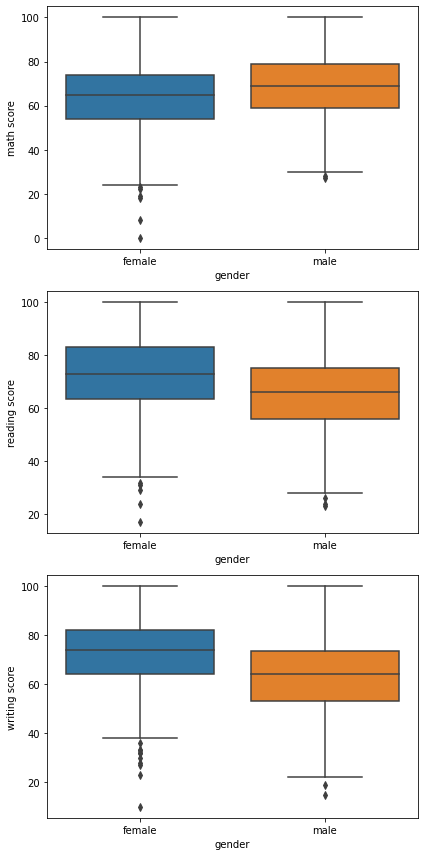

In [19]:
fig,ax = plt.subplots(3,1, figsize = (6,12))

sns.boxplot(x=dataset['gender'],y=dataset['math score'],ax=ax[0])
sns.boxplot(x=dataset['gender'],y=dataset['reading score'],ax=ax[1])
sns.boxplot(x=dataset['gender'],y=dataset['writing score'],ax=ax[2])
plt.tight_layout()

# Here below we can see the outlier with the median in all 3 subjects. This can be compared to above plot, which shows that 
# males have performed will in maths and females have performed well in reading and writing, with less outliers.

In [20]:
# Counting students in each race/ethnicity
dataset['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group B'),
  Text(1, 0, 'group C'),
  Text(2, 0, 'group D'),
  Text(3, 0, 'group A'),
  Text(4, 0, 'group E')])

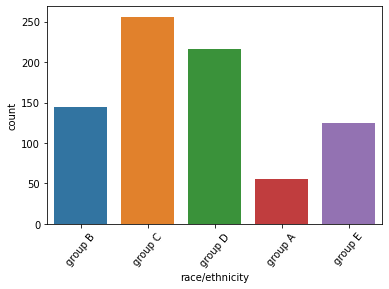

In [22]:
sns.countplot(dataset['race/ethnicity'].loc[dataset['class']=='P']) # Plotting the students who have passed
plt.xticks(rotation = 50)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of students')

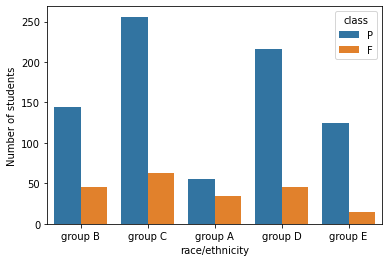

In [23]:
# Students who have passed or failed in comparison to race/ethnicity

sns.countplot(dataset['race/ethnicity'],hue=dataset['class'])
plt.ylabel('Number of students')

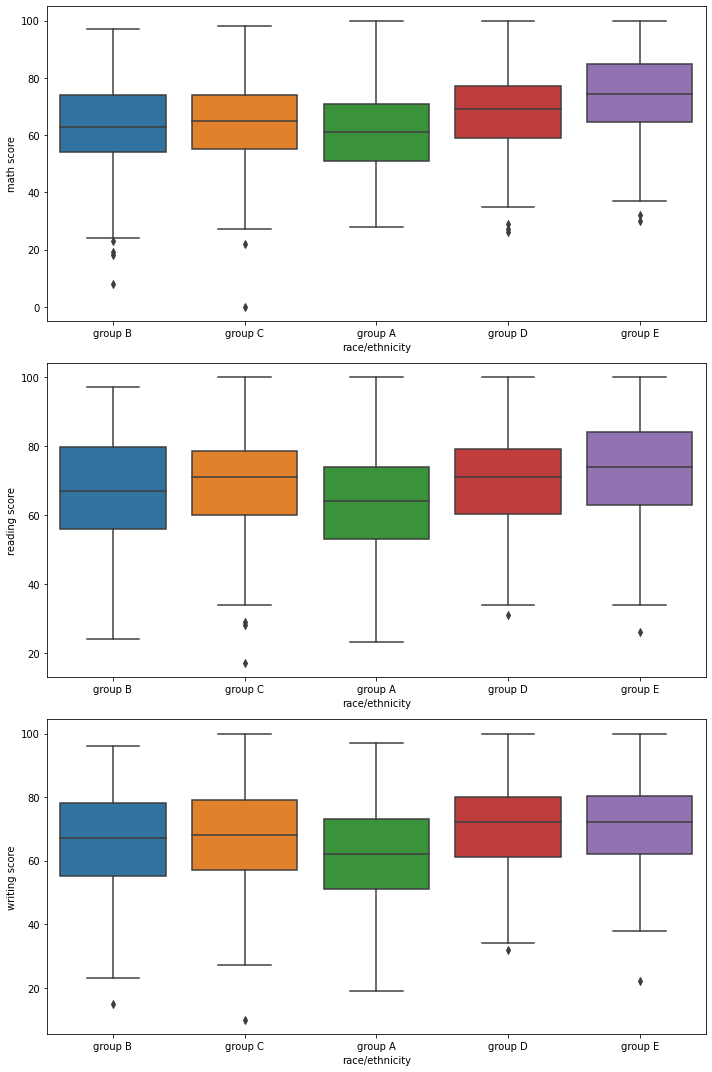

In [24]:
fig, ax = plt.subplots(3,1, figsize=(10,15))
sns.boxplot(x=dataset['race/ethnicity'],y=dataset['math score'],ax=ax[0])
sns.boxplot(x=dataset['race/ethnicity'],y=dataset['reading score'],ax=ax[1])
sns.boxplot(x=dataset['race/ethnicity'],y=dataset['writing score'],ax=ax[2])
plt.tight_layout()

# Here we can see that group A has done bad compared to group E

In [25]:
# Counting students in each parental level of education
dataset['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

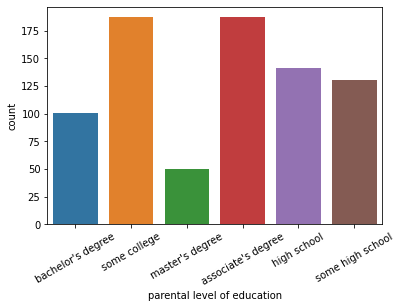

In [27]:
sns.countplot(dataset['parental level of education'].loc[dataset['class']=='P'])
plt.xticks(rotation = 30)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of students')

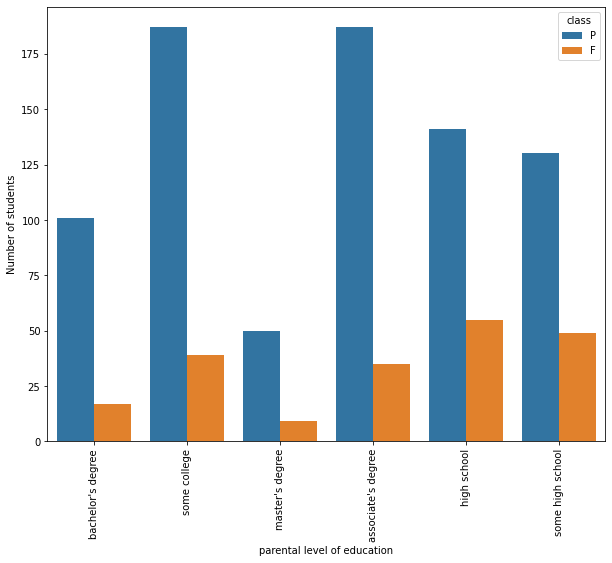

In [28]:
#Pass/Fail according to parental level of education

plt.figure(figsize= (10,8))
sns.countplot(dataset['parental level of education'],hue=dataset['class'])
plt.xticks(rotation=90)
plt.ylabel('Number of students')

# The following graph shows that there is an impact of parental level of education on the number of students that 
# pass and fail

In [29]:
# Counting students in terms of the type of lunch
dataset['lunch'].loc[dataset['class']=='P'].value_counts()

standard        562
free/reduced    234
Name: lunch, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lunch', ylabel='count'>

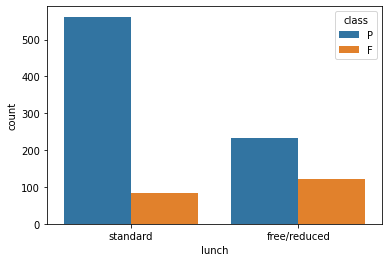

In [30]:
#Plotting the number of students who passed and failed in each type of lunch
sns.countplot(dataset['lunch'],hue=dataset['class'])

# The following graph shows that students with standard lunch have passed more than the students who have got free/reduced

In [31]:
# Counting students in terms of test preperation course
dataset['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

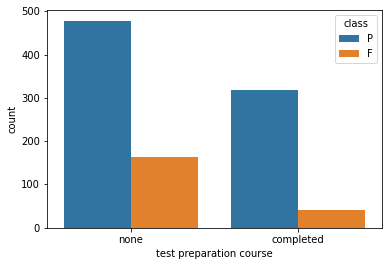

In [32]:
#Plotting the number of students who passed and failed in each type of lunch
sns.countplot(dataset['test preparation course'],hue=dataset['class'])

# THe followiing graph shows that students who had no preperation failed more than the ones who had

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'math score'),
  Text(1.5, 0, 'reading score'),
  Text(2.5, 0, 'writing score')])

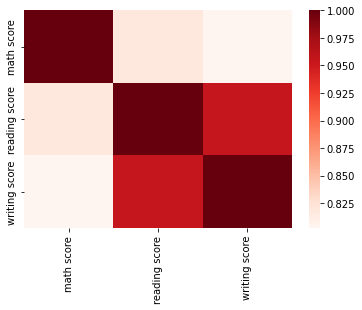

In [33]:
sns.heatmap(dataset.corr(), cmap ="Reds")
plt.xticks(rotation=90)

# The following heat-map shows that there is correlation between the subjects

### Now using label encoder to encode our string data to numerical data

In [34]:
from sklearn.preprocessing import LabelEncoder

print("test preparation course = : ")
print(dataset['test preparation course'].unique(),  "\n")

# encoder created here
encoder = LabelEncoder()

# label encoding for test preparation course
dataset['test preparation course'] = encoder.fit_transform(dataset['test preparation course'])
dataset['test preparation course'].value_counts()

test preparation course = : 
['none' 'completed'] 



1    642
0    358
Name: test preparation course, dtype: int64

In [35]:
print("lunch = : ")
print(dataset['lunch'].unique(),  "\n")

# label encoding for lunch
dataset['lunch'] = encoder.fit_transform(dataset['lunch'])
dataset['lunch'].value_counts()

lunch = : 
['standard' 'free/reduced'] 



1    645
0    355
Name: lunch, dtype: int64

In [36]:

print("race/ethnicity = : ")
print(dataset['race/ethnicity'].unique(),  "\n")

# label encoding for race/ethnicity

dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group A', 1)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group B', 2)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group C', 3)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group D', 4)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group E', 5)

dataset['race/ethnicity'].value_counts()

race/ethnicity = : 
['group B' 'group C' 'group A' 'group D' 'group E'] 



3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [37]:

print("parental level of education = : ")
print(dataset['parental level of education'].unique(),  "\n")

# label encoding for parental level of education

dataset['parental level of education'] = encoder.fit_transform(dataset['parental level of education'])
dataset['parental level of education'].value_counts()

parental level of education = : 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 



4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [38]:

print("gender = : ")
print(dataset['gender'].unique(),  "\n")

# label encoding for gender

dataset['gender'] = encoder.fit_transform(dataset['gender'])
dataset['gender'].value_counts()

gender = : 
['female' 'male'] 



0    518
1    482
Name: gender, dtype: int64

In [41]:

print("gender = : ")
print(dataset['class'].unique(),  "\n")

# label encoding for pass/fail

dataset['class'] = encoder.fit_transform(dataset['class'])
dataset['class'].value_counts()

gender = : 
['P' 'F'] 



1    796
0    204
Name: class, dtype: int64

### Now checking shape and head of data again with our new column 'class'

In [42]:
dataset.shape

(1000, 9)

In [43]:
dataset.head()

# Now we have our data in all the numerical form

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,class
0,0,2,1,1,1,72,72,74,1
1,0,3,4,1,0,69,90,88,1
2,0,2,3,1,1,90,95,93,1
3,1,1,0,0,1,47,57,44,0
4,1,3,4,1,1,76,78,75,1


### Now splitting our data where y is the 'class' column and the rest are x

In [44]:

# splitting the dependent and independent variables

x = dataset.iloc[:,:8]
y = dataset.iloc[:,8]

print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


In [45]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 8)
(750,)
(250, 8)
(250,)


### Scaling our data so that all the columns are in a similar scale

In [46]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
scaler = MinMaxScaler()

# transforming the independent variable
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Applying Logistic Regression to evaluate students, and displaying confusion matrix and kfold cross validation to avoid overfitting

In [47]:
# Importing Logistic Regression
from sklearn.linear_model import  LogisticRegression

# creating a model of logistic regression
model = LogisticRegression()

# training data into model
model.fit(x_train, y_train)

# predicting test data values
y_pred = model.predict(x_test)

# calculating accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.956
Testing Accuracy : 0.96


In [48]:
# Importing Confusion Matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# printing confusion matrix
print(matrix)

[[ 49   7]
 [  3 191]]


In [49]:
# k fold cross validation to avoid overfitting of the model

from sklearn.model_selection import cross_val_score

# accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

#  mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# standard variance of the models
print("mean standard variance :", accuracies.std())

[0.97368421 0.89473684 0.94736842 0.92105263 1.         0.97368421
 0.94736842 0.97368421 0.89473684 0.92105263 0.91891892 1.
 0.94594595 0.97297297 0.94594595 0.94594595 0.94594595 1.
 0.97297297 0.97297297]
mean accuracy : 0.9534495021337126
mean standard variance : 0.03111083058902891


### Applying Random Forest Classifier to evaluate students, and displaying confusion matrix and kfold cross validation to avoid overfitting

In [50]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# creating a model of Random Forest Classifier
model = RandomForestClassifier()

# training data into model
model.fit(x_train, y_train)

# predicting test data values
y_pred = model.predict(x_test)

# calculating accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.992


In [51]:
# Importing Confusion Matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# printing confusion matrix
print(matrix)

[[ 56   0]
 [  2 192]]


In [52]:
# k fold cross validation to avoid overfitting of the model

from sklearn.model_selection import cross_val_score

# accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

#  mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# standard variance of the models
print("mean standard variance :", accuracies.std())

[1.         0.97368421 1.         0.97368421 1.         1.
 1.         1.         0.94736842 1.         1.         1.
 1.         0.97297297 1.         1.         1.         1.
 0.97297297 1.        ]
mean accuracy : 0.9920341394025604
mean standard variance : 0.014742703843634165


### Applying Decision Tree Classifier to evaluate students, and displaying confusion matrix and kfold cross validation to avoid overfitting

In [53]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# creating a Decision Tree Classifier
model = DecisionTreeClassifier()

# training data into model
model.fit(x_train, y_train)

# predicting test data values
y_pred = model.predict(x_test)

# calculating accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [54]:
# Importing Confusion Matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# printing confusion matrix
print(matrix)

[[ 56   0]
 [  0 194]]


In [55]:
# k fold cross validation to avoid overfitting of the model

from sklearn.model_selection import cross_val_score

# accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

#  mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# standard variance of the models
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0
